<a href="https://colab.research.google.com/github/cml096/GoogleColabRepo/blob/master/cristobal/Data-02/Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
df = pd.read_excel('OperTot - PowerView_ARCH1.xlsx')

In [64]:
list_drop = ['ID','shiftindex','crew#','unit#','tmcat08','tmcat09','tmcat10','tmcat11','tmcat12','tmcat13','tmcat14','tmcat15','tmcat16','tmcat17','tmcat18','tmcat19']
df.drop(list_drop,axis=1,inplace=True)

In [65]:
df["shift#"] = df["shift#"].astype(str)
df.totaltons = df.totaltons.astype(int)

In [66]:
df_loads = df[(df.unit == 'Camion') | (df.unit == 'Pala')]
df_times = df[(df.unit == 'Aljibe') | (df.unit == 'Auxil') | (df.unit == 'Moto') | (df.unit == 'Perforadora') | (df.unit == 'Tractor')]

In [67]:
list_drop = ['shiftdate','crew','eqmtid','locid','operid','pit','unit','shift#']
df_loads.drop(list_drop,axis=1,inplace=True)
df_times.drop(list_drop,axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#Regresion Lineal (Cargas - Data 1)

In [298]:
df_loads.corr()

,start,logintime,totaltime,totalloads,totaltons,loadtime,idletime,spottime,loadcnt,tmcat00,tmcat01,tmcat02,tmcat03,tmcat04,tmcat05,tmcat06,tmcat07
start,1.000000,0.043744,-0.023277,-0.022312,-0.022497,-0.020255,0.097800,-0.018215,-0.022312,-0.023277,0.008666,0.005576,0.039238,-0.010427,-0.000193,-0.048197,0.005299
logintime,0.043744,1.000000,-0.361160,-0.013759,-0.013633,-0.012172,-0.056511,-0.016579,-0.013759,-0.361160,-0.079763,-0.001214,-0.089956,-0.161130,-0.142058,-0.153841,-0.052747
totaltime,-0.023277,-0.361160,1.000000,0.204233,0.203926,0.208464,0.214901,0.187593,0.204233,1.000000,0.408531,0.002789,0.114047,0.379081,0.354591,0.344571,0.139980
totalloads,-0.022312,-0.013759,0.204233,1.000000,0.999383,0.859050,0.289899,0.874202,1.000000,0.204233,0.611349,0.008195,0.263569,-0.109560,-0.156496,-0.039449,-0.062604
totaltons,-0.022497,-0.013633,0.203926,0.999383,1.000000,0.858413,0.289693,0.873537,0.999383,0.203926,0.610858,0.008223,0.262624,-0.109512,-0.156405,-0.039493,-0.062569
loadtime,-0.020255,-0.012172,0.208464,0.859050,0.858413,1.000000,0.277514,0.785666,0.859050,0.208464,0.629309,0.006403,0.243604,-0.105784,-0.163314,-0.045758,-0.065403
idletime,0.097800,-0.056511,0.214901,0.289899,0.289693,0.277514,1.000000,0.255440,0.289899,0.214901,0.474923,0.003832,0.423785,-0.074980,-0.109145,0.015059,-0.041300
spottime,-0.018215,-0.016579,0.187593,0.874202,0.873537,0.785666,0.255440,1.000000,0.874202,0.187593,0.559771,0.011475,0.252784,-0.098839,-0.143939,-0.037351,-0.057526
loadcnt,-0.022312,-0.013759,0.204233,1.000000,0.999383,0.859050,0.289899,0.874202,1.000000,0.204233,0.611349,0.008195,0.263569,-0.109560,-0.156496,-0.039449,-0.062604
tmcat00,-0.023277,-0.361160,1.000000,0.204233,0.203926,0.208464,0.214901,0.187593,0.204233,1.000000,0.408531,0.002789,0.114047,0.379081,0.354591,0.344571,0.139980


*   "totalloads" y "totaltons" = 0.999383
*   "loadcnt" y "totaltons" = 0.999383
*   "loadcnt" y "totalloads" = 1.000000


*   "loadtime" y "totaltons" = 0.858413
*   "loadtime" y "totalloads" = 0.858413
*   "loadtime" y "loadcnt" = 0.858413


*   "spottime" y "totalloads" = 0.874202
*   "spottime" y "totalloads" = 0.874202
*   "spottime" y "loadcnt" = 0.874202

*   "tmcat00" y "totaltime" = 1.000000


Cargas - Camiones y Palas

In [68]:
df_loads.columns

Index(['start', 'logintime', 'totaltime', 'totalloads', 'totaltons',
       'loadtime', 'idletime', 'spottime', 'loadcnt', 'tmcat00', 'tmcat01',
       'tmcat02', 'tmcat03', 'tmcat04', 'tmcat05', 'tmcat06', 'tmcat07'],
      dtype='object')

## totaltons

In [289]:
from sklearn.model_selection import train_test_split
target = "totaltons"
drop = [target,'totalloads','totaltime']
X = df_loads.drop(target,axis=1)
y = df_loads[target]

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [291]:
from sklearn import linear_model
modelo = linear_model.LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [292]:
y_pred = modelo.predict(X_test)
pd.DataFrame(modelo.coef_,X.columns,columns=['Coefficient'])

,Coefficient
start,-1.678637e-05
logintime,-2.198744e-05
totaltime,-3.465374e+09
totalloads,-9.900555e+06
loadtime,-3.704550e-04
idletime,5.246466e-04
spottime,-2.183702e-03
loadcnt,9.900786e+06
tmcat00,3.465374e+09
tmcat01,-1.034539e-04


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


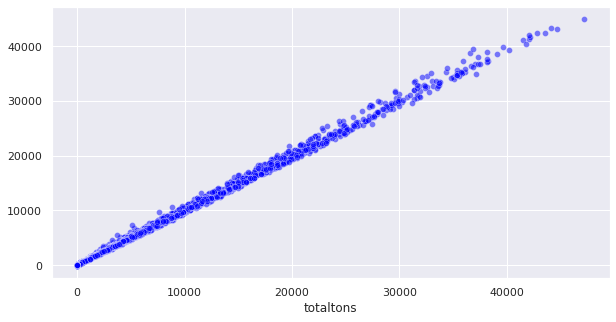

In [293]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.figure(figsize=(10,5))
sns.scatterplot(y_test,y_pred,color='blue',alpha=0.5)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


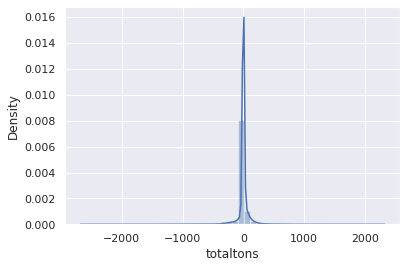

In [294]:
sns.distplot((y_test-y_pred),bins=50)

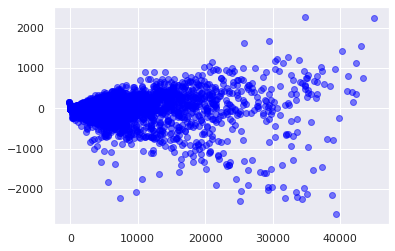

In [295]:
plt.scatter(y_pred,y_test-y_pred,c='blue',alpha=0.5)

In [296]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.998805175933018

In [297]:
print(f'Error Cuadrático Medio: {metrics.mean_squared_error(y_test,y_pred)}')

Error Cuadrático Medio: 15122.290548093035


## totalloads

In [280]:
from sklearn.model_selection import train_test_split
target = "totalloads"
drop = [target,'totaltons','totaltime']
X = df_loads.drop(target,axis=1)
y = df_loads[target]

In [281]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [282]:
from sklearn import linear_model
modelo = linear_model.LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [283]:
y_pred = modelo.predict(X_test)
pd.DataFrame(modelo.coef_,X.columns,columns=['Coefficient'])

,Coefficient
start,4.703140e-20
logintime,-7.784572e-17
totaltime,6.442537e-04
totaltons,-2.338116e-16
loadtime,-1.347291e-16
idletime,-2.480112e-17
spottime,-2.194823e-16
loadcnt,1.000000e+00
tmcat00,-6.442537e-04
tmcat01,-3.006289e-17


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


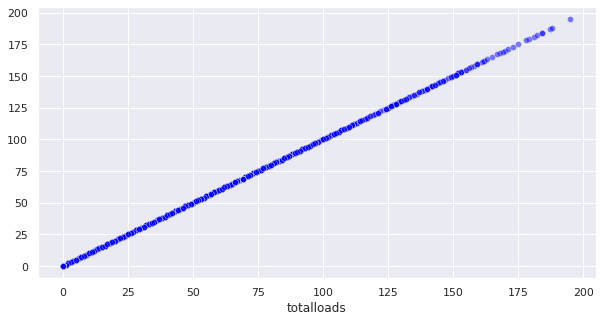

In [284]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.figure(figsize=(10,5))
sns.scatterplot(y_test,y_pred,color='blue',alpha=0.5)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


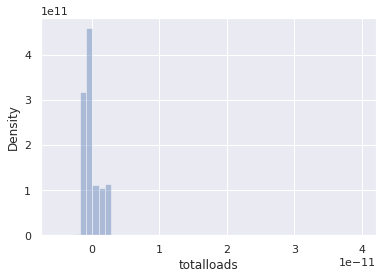

In [285]:
sns.distplot((y_test-y_pred),bins=50)

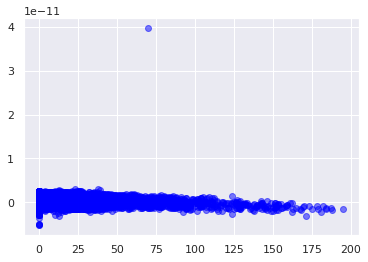

In [286]:
plt.scatter(y_pred,y_test-y_pred,c='blue',alpha=0.5)

In [287]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

1.0

In [288]:
print(f'Error Cuadrático Medio: {metrics.mean_squared_error(y_test,y_pred)}')

Error Cuadrático Medio: 1.1428071967874274e-24


## spottime

In [271]:
from sklearn.model_selection import train_test_split
target = "spottime"
drop = [target,'totaltons','loadcnt']
X = df_loads.drop(target,axis=1)
y = df_loads[target]

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [273]:
from sklearn import linear_model
modelo = linear_model.LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [274]:
y_pred = modelo.predict(X_test)
pd.DataFrame(modelo.coef_,X.columns,columns=['Coefficient'])

,Coefficient
start,1.884194e-04
logintime,-8.237158e-05
totaltime,6.845932e+08
totalloads,9.136094e+06
totaltons,-3.620286e-02
loadtime,3.710779e-02
idletime,-5.206476e-03
loadcnt,-9.136040e+06
tmcat00,-6.845932e+08
tmcat01,-1.455631e-02


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


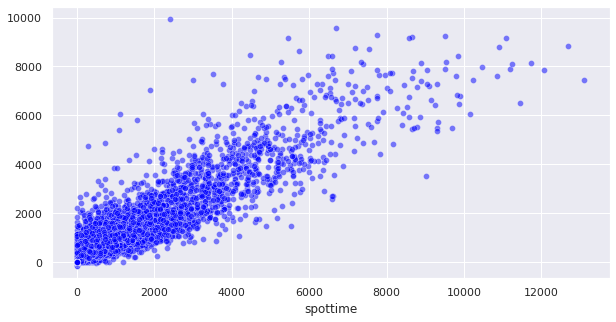

In [275]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.figure(figsize=(10,5))
sns.scatterplot(y_test,y_pred,color='blue',alpha=0.5)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


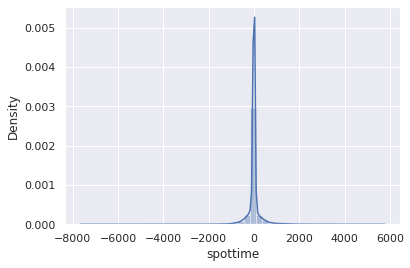

In [276]:
sns.distplot((y_test-y_pred),bins=50)

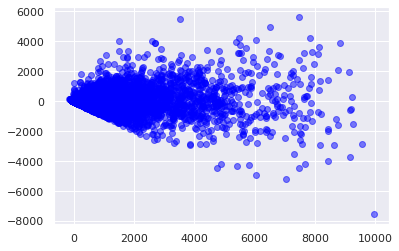

In [277]:
plt.scatter(y_pred,y_test-y_pred,c='blue',alpha=0.5)

In [278]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.8620548878499317

In [279]:
print(f'Error Cuadrático Medio: {metrics.mean_squared_error(y_test,y_pred)}')

Error Cuadrático Medio: 109851.53904711375


## loadcnt

In [299]:
from sklearn.model_selection import train_test_split
target = "loadcnt"
drop = [target,'totaltons','totaltime']
X = df_loads.drop(target,axis=1)
y = df_loads[target]

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [301]:
from sklearn import linear_model
modelo = linear_model.LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [302]:
y_pred = modelo.predict(X_test)
pd.DataFrame(modelo.coef_,X.columns,columns=['Coefficient'])

,Coefficient
start,-8.921269e-18
logintime,4.304283e-17
totaltime,-3.251758e-04
totalloads,1.000000e+00
totaltons,6.161372e-15
loadtime,4.816568e-17
idletime,2.944015e-16
spottime,2.607125e-16
tmcat00,3.251758e-04
tmcat01,-1.658795e-16


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


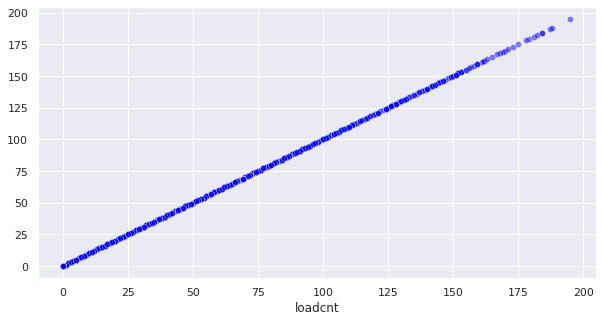

In [303]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.figure(figsize=(10,5))
sns.scatterplot(y_test,y_pred,color='blue',alpha=0.5)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


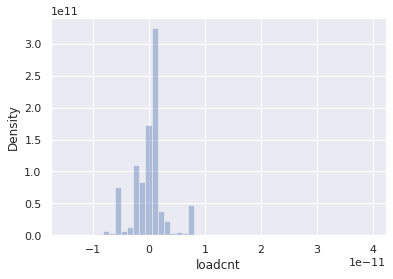

In [304]:
sns.distplot((y_test-y_pred),bins=50)

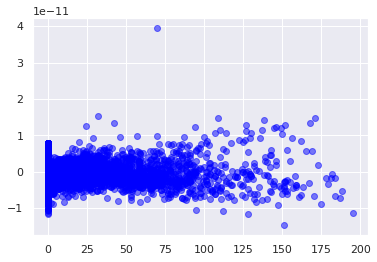

In [305]:
plt.scatter(y_pred,y_test-y_pred,c='blue',alpha=0.5)

In [306]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

1.0

In [307]:
print(f'Error Cuadrático Medio: {metrics.mean_squared_error(y_test,y_pred)}')

Error Cuadrático Medio: 8.148342242978877e-24


## idletime

In [308]:
from sklearn.model_selection import train_test_split
target = "idletime"
drop = [target,'totaltons','totaltime']
X = df_loads.drop(target,axis=1)
y = df_loads[target]

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [310]:
from sklearn import linear_model
modelo = linear_model.LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [311]:
y_pred = modelo.predict(X_test)
pd.DataFrame(modelo.coef_,X.columns,columns=['Coefficient'])

,Coefficient
start,1.566251e-02
logintime,4.594935e-03
totaltime,1.523249e+11
totalloads,-9.267294e+07
totaltons,3.625502e-01
loadtime,-7.267610e-02
spottime,-2.171868e-01
loadcnt,9.267288e+07
tmcat00,-1.523249e+11
tmcat01,-2.612264e-02


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


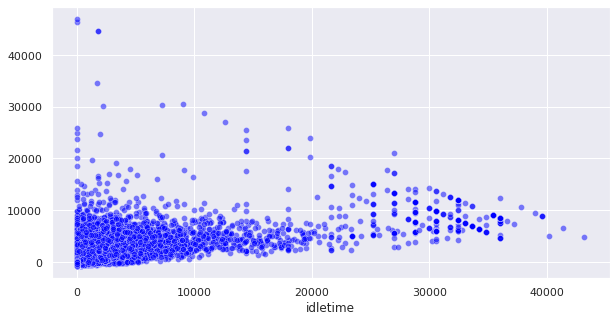

In [312]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.figure(figsize=(10,5))
sns.scatterplot(y_test,y_pred,color='blue',alpha=0.5)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


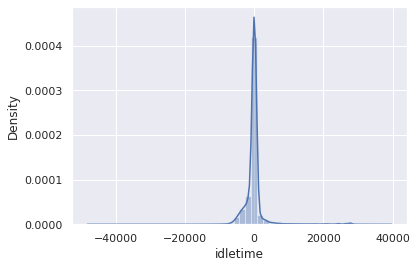

In [313]:
sns.distplot((y_test-y_pred),bins=50)

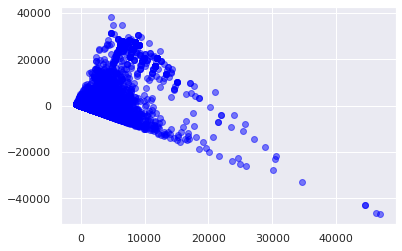

In [314]:
plt.scatter(y_pred,y_test-y_pred,c='blue',alpha=0.5)

In [315]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.296108383963806

In [316]:
print(f'Error Cuadrático Medio: {metrics.mean_squared_error(y_test,y_pred)}')

Error Cuadrático Medio: 11769087.00618841


## loadtime

In [317]:
from sklearn.model_selection import train_test_split
target = "loadtime"
drop = [target,'totaltons','totaltime']
X = df_loads.drop(target,axis=1)
y = df_loads[target]

In [318]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [319]:
from sklearn import linear_model
modelo = linear_model.LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [320]:
y_pred = modelo.predict(X_test)
pd.DataFrame(modelo.coef_,X.columns,columns=['Coefficient'])

,Coefficient
start,-8.636251e-04
logintime,1.503017e-03
totaltime,-4.938786e+08
totalloads,-2.825499e+06
totaltons,-5.090330e-02
idletime,-1.442897e-02
spottime,3.072325e-01
loadcnt,2.825640e+06
tmcat00,4.938786e+08
tmcat01,-3.452156e-02


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


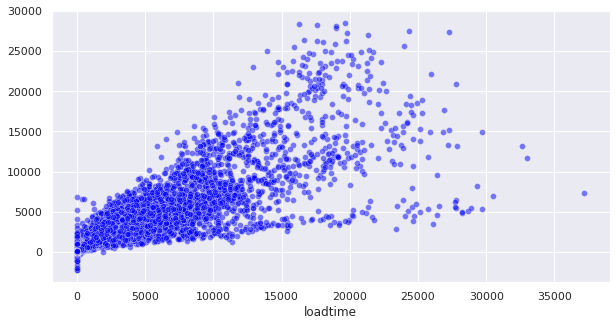

In [321]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.figure(figsize=(10,5))
sns.scatterplot(y_test,y_pred,color='blue',alpha=0.5)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


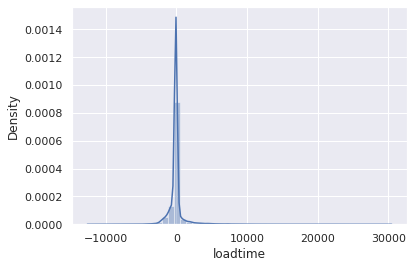

In [322]:
sns.distplot((y_test-y_pred),bins=50)

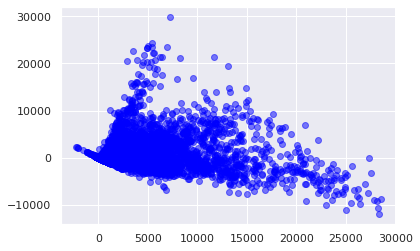

In [323]:
plt.scatter(y_pred,y_test-y_pred,c='blue',alpha=0.5)

In [324]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.7710078234309553

In [325]:
print(f'Error Cuadrático Medio: {metrics.mean_squared_error(y_test,y_pred)}')

Error Cuadrático Medio: 2023702.24165901


## tmcat01

In [119]:
from sklearn.model_selection import train_test_split
target = "tmcat01"
drop = [target,'totalloads','totaltime'] 
X = df_loads.drop(target,axis=1)
y = df_loads[target]

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [121]:
from sklearn import linear_model
modelo = linear_model.LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [122]:
y_pred = modelo.predict(X_test)
pd.DataFrame(modelo.coef_,X.columns,columns=['Coefficient'])

,Coefficient
start,0.000195
logintime,-0.000124
totaltime,0.499841
totalloads,0.422503
totaltons,-0.000599
loadtime,-0.001474
idletime,-0.000221
spottime,-0.005146
loadcnt,0.422503
tmcat00,0.499841


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


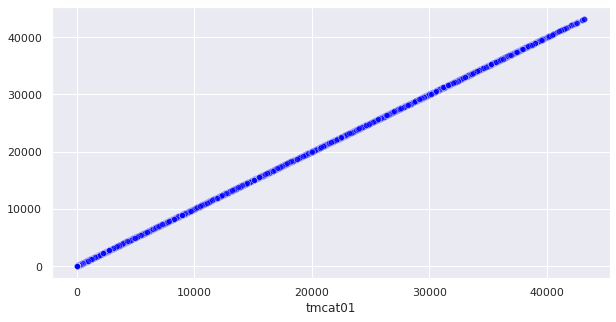

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.figure(figsize=(10,5))
sns.scatterplot(y_test,y_pred,color='blue',alpha=0.5)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


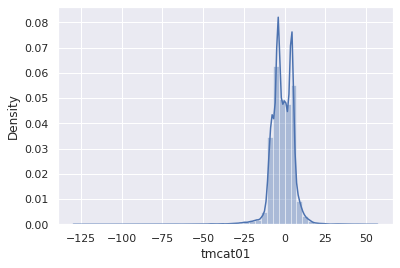

In [124]:
sns.distplot((y_test-y_pred),bins=50)

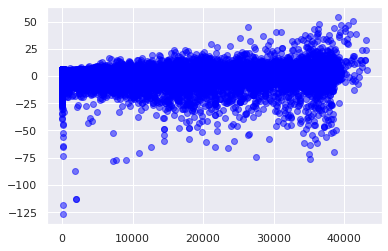

In [125]:
plt.scatter(y_pred,y_test-y_pred,c='blue',alpha=0.5)

In [126]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.9999996562804009

In [127]:
print(f'Error Cuadrático Medio: {metrics.mean_squared_error(y_test,y_pred)}')

Error Cuadrático Medio: 51.88581877975973


## tmcat02

In [128]:
from sklearn.model_selection import train_test_split
target = "tmcat02"
drop = [target,'totalloads','totaltime']
X = df_loads.drop(target,axis=1)
y = df_loads[target]

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [130]:
from sklearn import linear_model
modelo = linear_model.LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [131]:
y_pred = modelo.predict(X_test)
pd.DataFrame(modelo.coef_,X.columns,columns=['Coefficient'])

,Coefficient
start,0.000017
logintime,-0.000010
totaltime,0.011991
totalloads,0.011486
totaltons,-0.000054
loadtime,-0.000078
idletime,-0.000010
spottime,-0.000105
loadcnt,0.011486
tmcat00,0.011991


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


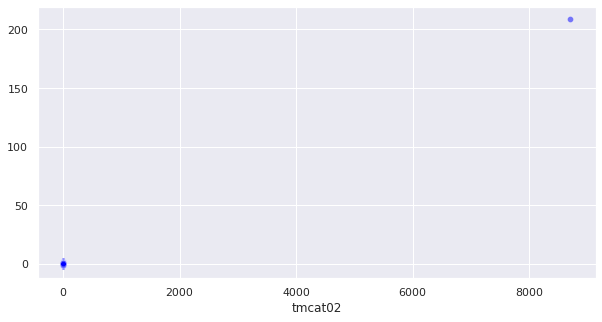

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.figure(figsize=(10,5))
sns.scatterplot(y_test,y_pred,color='blue',alpha=0.5)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


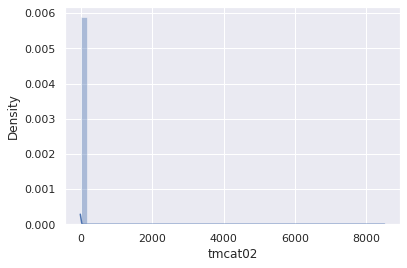

In [133]:
sns.distplot((y_test-y_pred),bins=50)

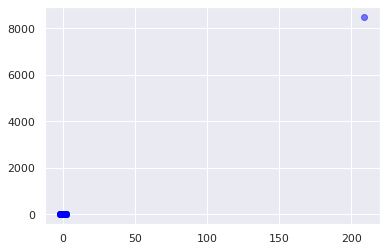

In [134]:
plt.scatter(y_pred,y_test-y_pred,c='blue',alpha=0.5)

In [135]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.04729307427334695

In [136]:
print(f'Error Cuadrático Medio: {metrics.mean_squared_error(y_test,y_pred)}')

Error Cuadrático Medio: 2184.8557828802827


## tmcat03

In [146]:
from sklearn.model_selection import train_test_split
target = "tmcat03"
drop = [target,'totalloads','totaltime']
X = df_loads.drop(target,axis=1)
y = df_loads[target]

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [148]:
from sklearn import linear_model
modelo = linear_model.LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [149]:
y_pred = modelo.predict(X_test)
pd.DataFrame(modelo.coef_,X.columns,columns=['Coefficient'])

,Coefficient
start,0.000223
logintime,-0.000934
totaltime,0.454645
totalloads,2.824829
totaltons,-0.021394
loadtime,-0.005140
idletime,0.007204
spottime,0.003223
loadcnt,2.824829
tmcat00,0.454645


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


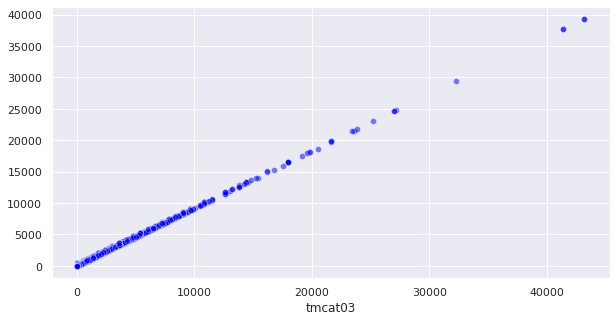

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.figure(figsize=(10,5))
sns.scatterplot(y_test,y_pred,color='blue',alpha=0.5)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


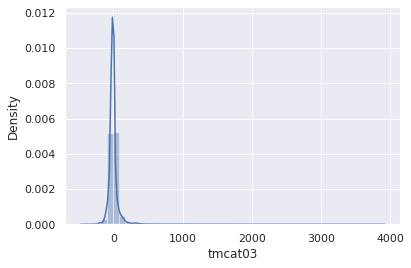

In [151]:
sns.distplot((y_test-y_pred),bins=50)

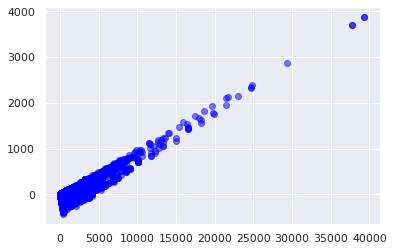

In [152]:
plt.scatter(y_pred,y_test-y_pred,c='blue',alpha=0.5)

In [153]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.9935512884822908

In [154]:
print(f'Error Cuadrático Medio: {metrics.mean_squared_error(y_test,y_pred)}')

Error Cuadrático Medio: 10195.041309701133


## tmcat04

In [155]:
from sklearn.model_selection import train_test_split
target = "tmcat04"
drop = [target,'totalloads','totaltime']
X = df_loads.drop(target,axis=1)
y = df_loads[target]

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [157]:
from sklearn import linear_model
modelo = linear_model.LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [158]:
y_pred = modelo.predict(X_test)
pd.DataFrame(modelo.coef_,X.columns,columns=['Coefficient'])

,Coefficient
start,0.000198
logintime,-0.000199
totaltime,0.499627
totalloads,0.377048
totaltons,-0.001022
loadtime,-0.003407
idletime,-0.001238
spottime,-0.005731
loadcnt,0.377048
tmcat00,0.499627


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


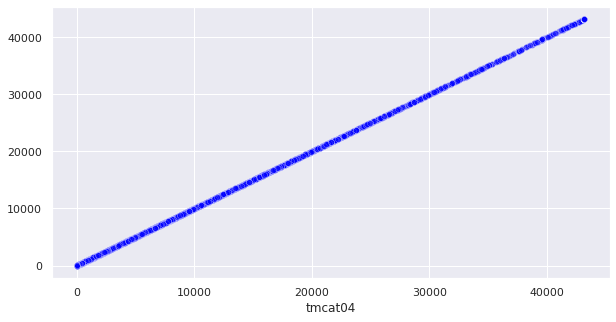

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.figure(figsize=(10,5))
sns.scatterplot(y_test,y_pred,color='blue',alpha=0.5)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


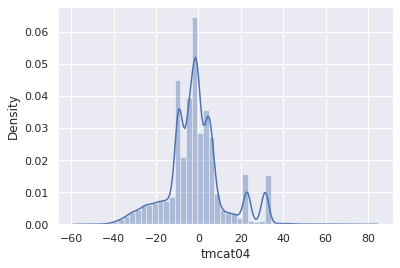

In [160]:
sns.distplot((y_test-y_pred),bins=50)

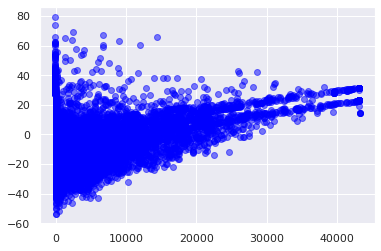

In [161]:
plt.scatter(y_pred,y_test-y_pred,c='blue',alpha=0.5)

In [162]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.9999987206503806

In [163]:
print(f'Error Cuadrático Medio: {metrics.mean_squared_error(y_test,y_pred)}')

Error Cuadrático Medio: 187.48218925354138


## tmcat05

In [164]:
from sklearn.model_selection import train_test_split
target = "tmcat05"
drop = [target,'totalloads','totaltime']
X = df_loads.drop(target,axis=1)
y = df_loads[target]

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [166]:
from sklearn import linear_model
modelo = linear_model.LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [167]:
y_pred = modelo.predict(X_test)
pd.DataFrame(modelo.coef_,X.columns,columns=['Coefficient'])

,Coefficient
start,0.000202
logintime,-0.000188
totaltime,0.499680
totalloads,0.387199
totaltons,-0.001037
loadtime,-0.003455
idletime,-0.001214
spottime,-0.005727
loadcnt,0.387199
tmcat00,0.499680


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


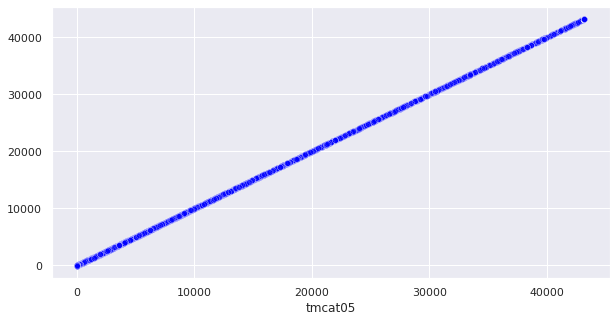

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.figure(figsize=(10,5))
sns.scatterplot(y_test,y_pred,color='blue',alpha=0.5)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


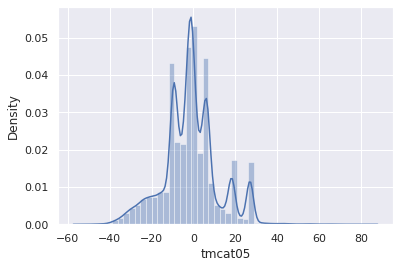

In [169]:
sns.distplot((y_test-y_pred),bins=50)

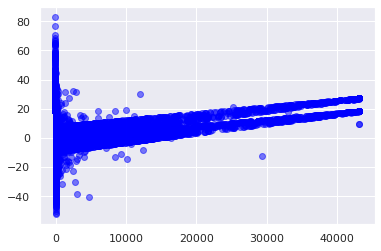

In [170]:
plt.scatter(y_pred,y_test-y_pred,c='blue',alpha=0.5)

In [171]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.9999989381621033

In [172]:
print(f'Error Cuadrático Medio: {metrics.mean_squared_error(y_test,y_pred)}')

Error Cuadrático Medio: 172.39508368909588


## tmcat06

In [173]:
from sklearn.model_selection import train_test_split
target = "tmcat06"
drop = [target,'totalloads','totaltime']
X = df_loads.drop(target,axis=1)
y = df_loads[target]

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [175]:
from sklearn import linear_model
modelo = linear_model.LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [176]:
y_pred = modelo.predict(X_test)
pd.DataFrame(modelo.coef_,X.columns,columns=['Coefficient'])

,Coefficient
start,0.000178
logintime,-0.000205
totaltime,0.499477
totalloads,0.381895
totaltons,-0.000996
loadtime,-0.003487
idletime,-0.001170
spottime,-0.005785
loadcnt,0.381895
tmcat00,0.499477


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


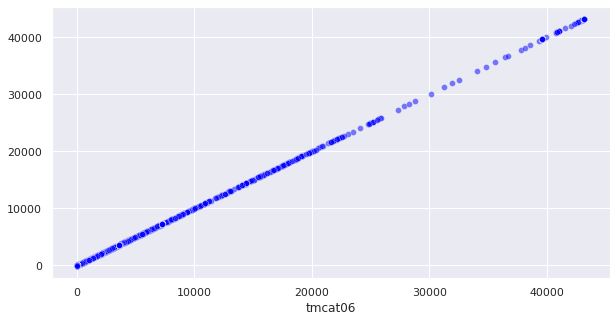

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.figure(figsize=(10,5))
sns.scatterplot(y_test,y_pred,color='blue',alpha=0.5)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


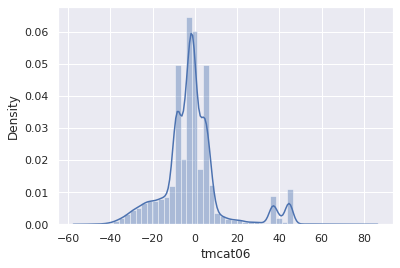

In [178]:
sns.distplot((y_test-y_pred),bins=50)

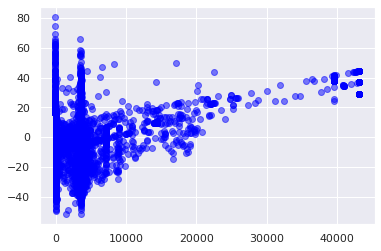

In [179]:
plt.scatter(y_pred,y_test-y_pred,c='blue',alpha=0.5)

In [180]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.9999978587065834

In [181]:
print(f'Error Cuadrático Medio: {metrics.mean_squared_error(y_test,y_pred)}')

Error Cuadrático Medio: 218.77254717970996


## tmcat07

In [182]:
from sklearn.model_selection import train_test_split
target = "tmcat07"
drop = [target,'totalloads','totaltime']
X = df_loads.drop(target,axis=1)
y = df_loads[target]

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [184]:
from sklearn import linear_model
modelo = linear_model.LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [185]:
y_pred = modelo.predict(X_test)
pd.DataFrame(modelo.coef_,X.columns,columns=['Coefficient'])

,Coefficient
start,0.000205
logintime,-0.000182
totaltime,0.498414
totalloads,0.383366
totaltons,-0.001007
loadtime,-0.003449
idletime,-0.001211
spottime,-0.005720
loadcnt,0.383366
tmcat00,0.498414


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


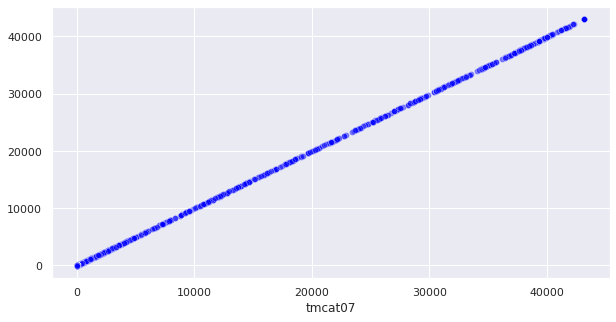

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.figure(figsize=(10,5))
sns.scatterplot(y_test,y_pred,color='blue',alpha=0.5)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


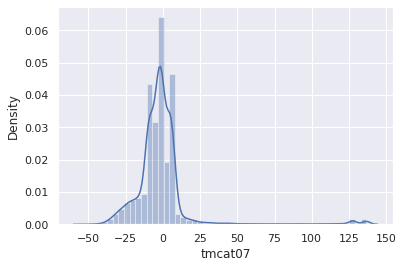

In [187]:
sns.distplot((y_test-y_pred),bins=50)

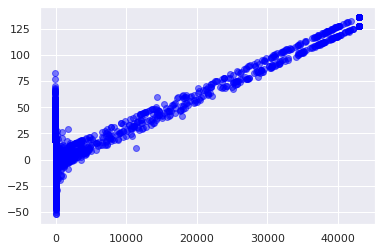

In [188]:
plt.scatter(y_pred,y_test-y_pred,c='blue',alpha=0.5)

In [189]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.9999865996082501

In [190]:
print(f'Error Cuadrático Medio: {metrics.mean_squared_error(y_test,y_pred)}')

Error Cuadrático Medio: 420.99169420378803


#Regresion Lineal (Tiempos - Data 2)

In [192]:
df_times.describe()

,start,logintime,totaltime,totalloads,totaltons,loadtime,idletime,spottime,loadcnt,tmcat00,tmcat01,tmcat02,tmcat03,tmcat04,tmcat05,tmcat06,tmcat07
count,37858.000000,37858.000000,37858.000000,37858.0,37858.0,37858.0,37858.0,37858.0,37858.0,37858.000000,37858.000000,37858.000000,37858.000000,37858.000000,37858.000000,37858.000000,37858.000000
mean,8156.247028,5331.790295,23467.734402,0.0,0.0,0.0,0.0,0.0,0.0,23467.734402,7580.089334,0.282133,730.194252,3993.773020,7212.988985,3300.217682,650.188996
std,21693.031160,10822.000051,18843.445811,0.0,0.0,0.0,0.0,0.0,0.0,18843.445811,13856.076407,28.817226,2382.574908,11442.619112,15400.680221,10874.727086,4766.390589
min,-14400.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-14400.000000,0.000000,1943.250000,0.0,0.0,0.0,0.0,0.0,0.0,1943.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28800.000000,0.000000,26689.000000,0.0,0.0,0.0,0.0,0.0,0.0,26689.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,28800.000000,2792.000000,43200.000000,0.0,0.0,0.0,0.0,0.0,0.0,43200.000000,7603.750000,0.000000,459.000000,12.000000,74.750000,0.000000,0.000000
max,72000.000000,43196.000000,43200.000000,0.0,0.0,0.0,0.0,0.0,0.0,43200.000000,43200.000000,4794.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000


In [193]:
list_drop = ['totalloads','totaltons','loadtime','idletime','spottime','loadcnt']
df_times.drop(list_drop,axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [194]:
df_times.corr()

,start,logintime,totaltime,tmcat00,tmcat01,tmcat02,tmcat03,tmcat04,tmcat05,tmcat06,tmcat07
start,1.000000,0.077786,-0.049004,-0.049004,-0.030974,-0.001677,0.033734,-0.018615,-0.013307,-0.014948,0.001245
logintime,0.077786,1.000000,-0.349186,-0.349186,-0.058902,-0.000302,-0.024507,-0.119591,-0.176734,-0.134936,-0.030981
totaltime,-0.049004,-0.349186,1.000000,1.000000,0.365529,0.005481,0.079522,0.286756,0.427356,0.297480,0.103053
tmcat00,-0.049004,-0.349186,1.000000,1.000000,0.365529,0.005481,0.079522,0.286756,0.427356,0.297480,0.103053
tmcat01,-0.030974,-0.058902,0.365529,0.365529,1.000000,0.008401,0.191555,-0.165573,-0.251583,-0.120331,-0.072839
tmcat02,-0.001677,-0.000302,0.005481,0.005481,0.008401,1.000000,0.016074,-0.000182,-0.004364,-0.000421,-0.001333
tmcat03,0.033734,-0.024507,0.079522,0.079522,0.191555,0.016074,1.000000,-0.053568,-0.138768,-0.058169,-0.032755
tmcat04,-0.018615,-0.119591,0.286756,0.286756,-0.165573,-0.000182,-0.053568,1.000000,-0.153135,-0.101163,-0.033321
tmcat05,-0.013307,-0.176734,0.427356,0.427356,-0.251583,-0.004364,-0.138768,-0.153135,1.000000,-0.137351,-0.059836
tmcat06,-0.014948,-0.134936,0.297480,0.297480,-0.120331,-0.000421,-0.058169,-0.101163,-0.137351,1.000000,-0.039944



*   "tmcat00" y "totaltime" = 1.000000


Cargas - Camiones y Palas

In [195]:
df_times.columns

Index(['start', 'logintime', 'totaltime', 'tmcat00', 'tmcat01', 'tmcat02',
       'tmcat03', 'tmcat04', 'tmcat05', 'tmcat06', 'tmcat07'],
      dtype='object')

## logintime

In [197]:
from sklearn.model_selection import train_test_split
target = "logintime"
X = df_times.drop(target,axis=1)
y = df_times[target]

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [199]:
from sklearn import linear_model
modelo = linear_model.LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [200]:
y_pred = modelo.predict(X_test)
pd.DataFrame(modelo.coef_,X.columns,columns=['Coefficient'])

,Coefficient
start,3.118442e-02
totaltime,-2.572518e+12
tmcat00,3.841498e+12
tmcat01,-1.268980e+12
tmcat02,-1.268980e+12
tmcat03,-1.268980e+12
tmcat04,-1.268980e+12
tmcat05,-1.268980e+12
tmcat06,-1.268980e+12
tmcat07,-1.268980e+12


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


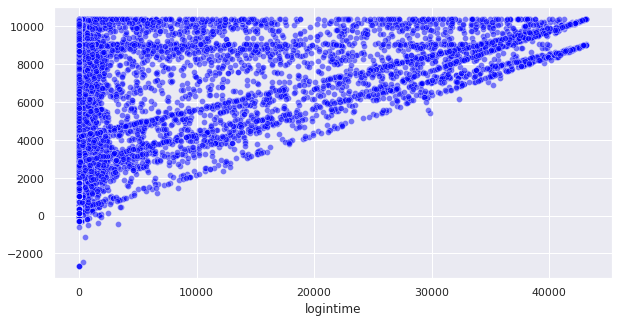

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.figure(figsize=(10,5))

sns.scatterplot(y_test,y_pred,color='blue',alpha=0.5)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


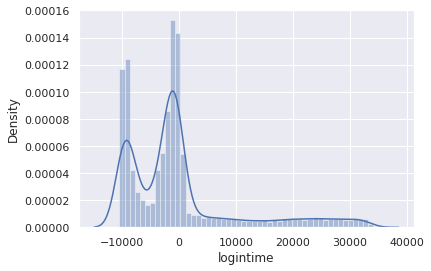

In [203]:
sns.distplot((y_test-y_pred),bins=50)

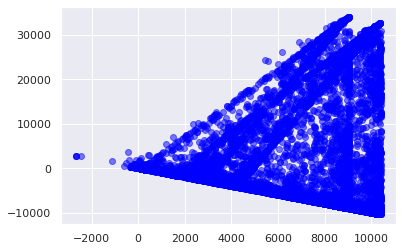

In [204]:
plt.scatter(y_pred,y_test-y_pred,c='blue',alpha=0.5)

In [205]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.13022898163618724

In [206]:
print(f'Error Cuadrático Medio: {metrics.mean_squared_error(y_test,y_pred)}')

Error Cuadrático Medio: 101689195.18238118


## tmcat01

In [207]:
from sklearn.model_selection import train_test_split
target = "tmcat01"
X = df_times.drop(target,axis=1)
y = df_times[target]

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [209]:
from sklearn import linear_model
modelo = linear_model.LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [210]:
y_pred = modelo.predict(X_test)
pd.DataFrame(modelo.coef_,X.columns,columns=['Coefficient'])

,Coefficient
start,7.748942e-17
logintime,2.775558e-16
totaltime,5.000000e-01
tmcat00,5.000000e-01
tmcat02,-1.000000e+00
tmcat03,-1.000000e+00
tmcat04,-1.000000e+00
tmcat05,-1.000000e+00
tmcat06,-1.000000e+00
tmcat07,-1.000000e+00


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


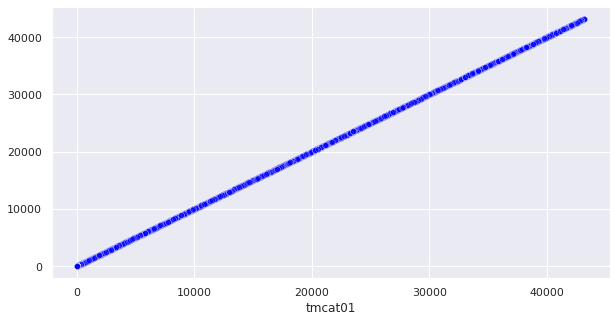

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.figure(figsize=(10,5))
sns.scatterplot(y_test,y_pred,color='blue',alpha=0.5)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


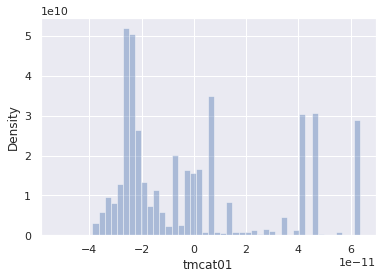

In [212]:
sns.distplot((y_test-y_pred),bins=50)

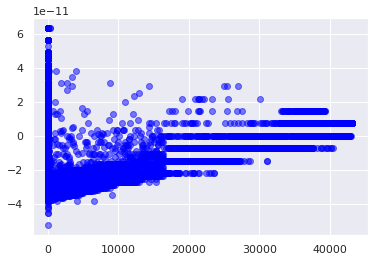

In [213]:
plt.scatter(y_pred,y_test-y_pred,c='blue',alpha=0.5)

In [214]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

1.0

In [215]:
print(f'Error Cuadrático Medio: {metrics.mean_squared_error(y_test,y_pred)}')

Error Cuadrático Medio: 8.806455949956422e-22


## tmcat02

In [216]:
from sklearn.model_selection import train_test_split
target = "tmcat02"
X = df_times.drop(target,axis=1)
y = df_times[target]

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [218]:
from sklearn import linear_model
modelo = linear_model.LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [219]:
y_pred = modelo.predict(X_test)
pd.DataFrame(modelo.coef_,X.columns,columns=['Coefficient'])

,Coefficient
start,3.738066e-17
logintime,2.088444e-17
totaltime,5.000000e-01
tmcat00,5.000000e-01
tmcat01,-1.000000e+00
tmcat03,-1.000000e+00
tmcat04,-1.000000e+00
tmcat05,-1.000000e+00
tmcat06,-1.000000e+00
tmcat07,-1.000000e+00


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


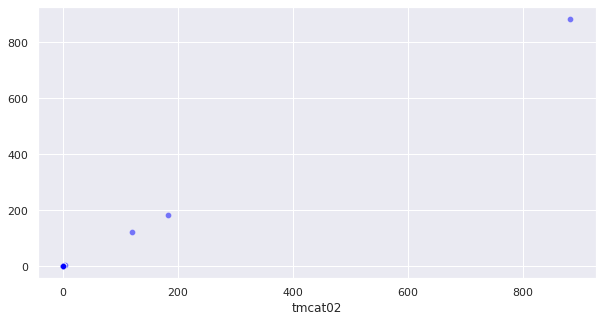

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.figure(figsize=(10,5))
sns.scatterplot(y_test,y_pred,color='blue',alpha=0.5)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


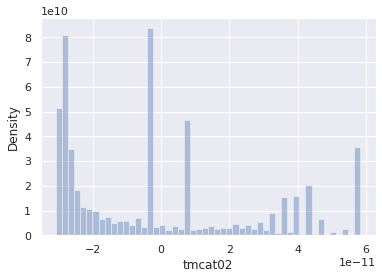

In [221]:
sns.distplot((y_test-y_pred),bins=50)

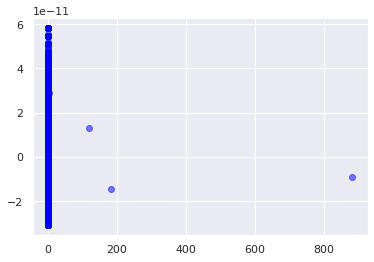

In [222]:
plt.scatter(y_pred,y_test-y_pred,c='blue',alpha=0.5)

In [223]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

1.0

In [224]:
print(f'Error Cuadrático Medio: {metrics.mean_squared_error(y_test,y_pred)}')

Error Cuadrático Medio: 7.82657565091417e-22


## tmcat03

In [225]:
from sklearn.model_selection import train_test_split
target = "tmcat03"
X = df_times.drop(target,axis=1)
y = df_times[target]

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [227]:
from sklearn import linear_model
modelo = linear_model.LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [228]:
y_pred = modelo.predict(X_test)
pd.DataFrame(modelo.coef_,X.columns,columns=['Coefficient'])

,Coefficient
start,3.250606e-17
logintime,-6.938894e-17
totaltime,5.000000e-01
tmcat00,5.000000e-01
tmcat01,-1.000000e+00
tmcat02,-1.000000e+00
tmcat04,-1.000000e+00
tmcat05,-1.000000e+00
tmcat06,-1.000000e+00
tmcat07,-1.000000e+00


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


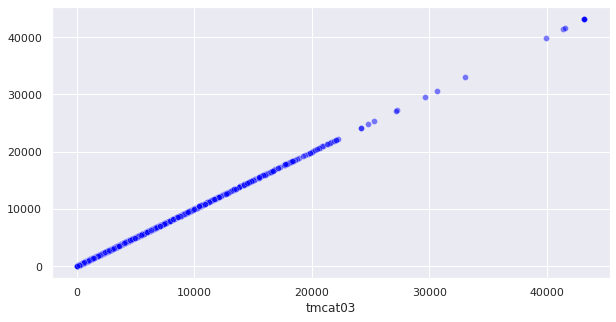

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.figure(figsize=(10,5))
sns.scatterplot(y_test,y_pred,color='blue',alpha=0.5)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


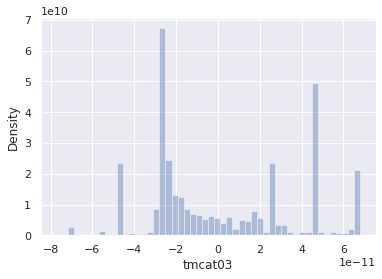

In [230]:
sns.distplot((y_test-y_pred),bins=50)

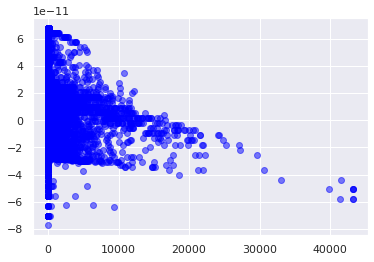

In [231]:
plt.scatter(y_pred,y_test-y_pred,c='blue',alpha=0.5)

In [232]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

1.0

In [233]:
print(f'Error Cuadrático Medio: {metrics.mean_squared_error(y_test,y_pred)}')

Error Cuadrático Medio: 1.2135119046590342e-21


## tmcat04

In [235]:
from sklearn.model_selection import train_test_split
target = "tmcat04"
X = df_times.drop(target,axis=1)
y = df_times[target]

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [237]:
from sklearn import linear_model
modelo = linear_model.LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [238]:
y_pred = modelo.predict(X_test)
pd.DataFrame(modelo.coef_,X.columns,columns=['Coefficient'])

,Coefficient
start,7.489390e-18
logintime,5.551115e-17
totaltime,5.000000e-01
tmcat00,5.000000e-01
tmcat01,-1.000000e+00
tmcat02,-1.000000e+00
tmcat03,-1.000000e+00
tmcat05,-1.000000e+00
tmcat06,-1.000000e+00
tmcat07,-1.000000e+00


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


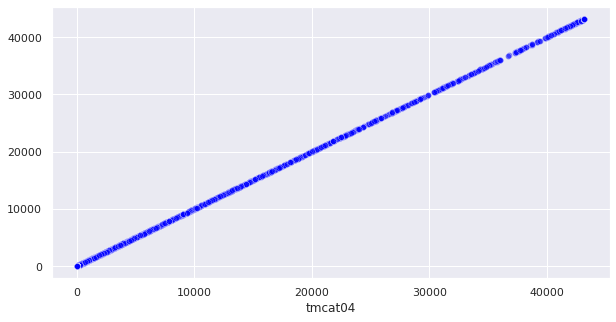

In [239]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.figure(figsize=(10,5))
sns.scatterplot(y_test,y_pred,color='blue',alpha=0.5)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


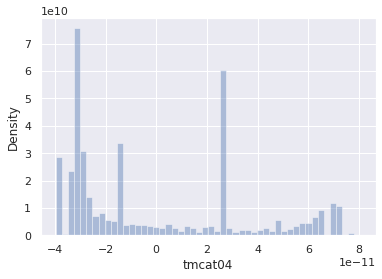

In [240]:
sns.distplot((y_test-y_pred),bins=50)

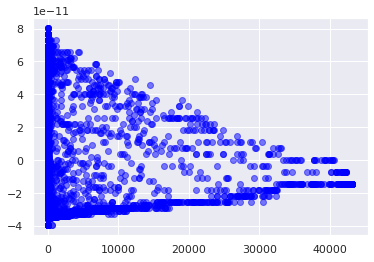

In [241]:
plt.scatter(y_pred,y_test-y_pred,c='blue',alpha=0.5)

In [242]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

1.0

In [243]:
print(f'Error Cuadrático Medio: {metrics.mean_squared_error(y_test,y_pred)}')

Error Cuadrático Medio: 1.242501338812471e-21


## tmcat05

In [244]:
from sklearn.model_selection import train_test_split
target = "tmcat05"
X = df_times.drop(target,axis=1)
y = df_times[target]

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [246]:
from sklearn import linear_model
modelo = linear_model.LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [247]:
y_pred = modelo.predict(X_test)
pd.DataFrame(modelo.coef_,X.columns,columns=['Coefficient'])

,Coefficient
start,5.150790e-17
logintime,3.885781e-16
totaltime,5.000000e-01
tmcat00,5.000000e-01
tmcat01,-1.000000e+00
tmcat02,-1.000000e+00
tmcat03,-1.000000e+00
tmcat04,-1.000000e+00
tmcat06,-1.000000e+00
tmcat07,-1.000000e+00


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


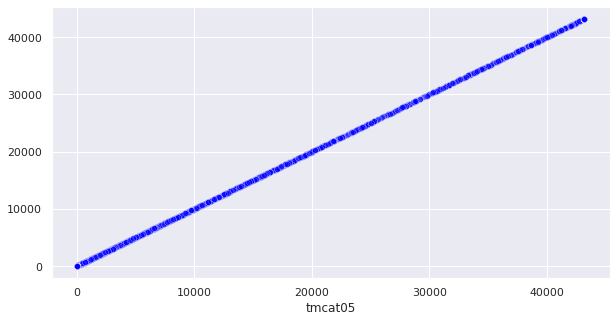

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.figure(figsize=(10,5))
sns.scatterplot(y_test,y_pred,color='blue',alpha=0.5)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


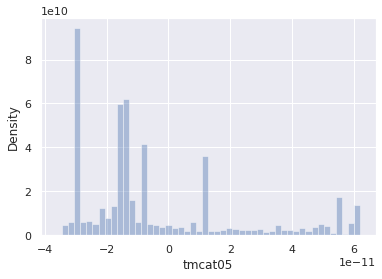

In [249]:
sns.distplot((y_test-y_pred),bins=50)

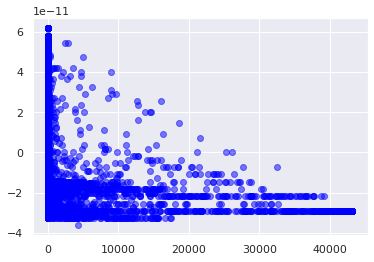

In [250]:
plt.scatter(y_pred,y_test-y_pred,c='blue',alpha=0.5)

In [251]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

1.0

In [252]:
print(f'Error Cuadrático Medio: {metrics.mean_squared_error(y_test,y_pred)}')

Error Cuadrático Medio: 7.021323819634427e-22


## tmcat06

In [253]:
from sklearn.model_selection import train_test_split
target = "tmcat06"
X = df_times.drop(target,axis=1)
y = df_times[target]

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [255]:
from sklearn import linear_model
modelo = linear_model.LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [256]:
y_pred = modelo.predict(X_test)
pd.DataFrame(modelo.coef_,X.columns,columns=['Coefficient'])

,Coefficient
start,4.681922e-19
logintime,-5.828671e-16
totaltime,5.000000e-01
tmcat00,5.000000e-01
tmcat01,-1.000000e+00
tmcat02,-1.000000e+00
tmcat03,-1.000000e+00
tmcat04,-1.000000e+00
tmcat05,-1.000000e+00
tmcat07,-1.000000e+00


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


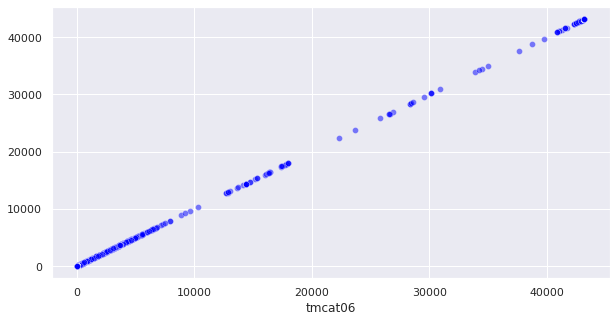

In [257]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.figure(figsize=(10,5))
sns.scatterplot(y_test,y_pred,color='blue',alpha=0.5)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


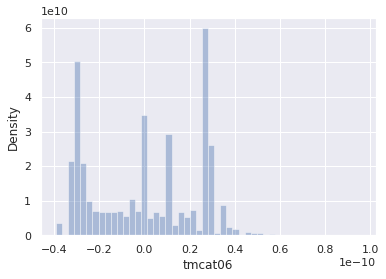

In [258]:
sns.distplot((y_test-y_pred),bins=50)

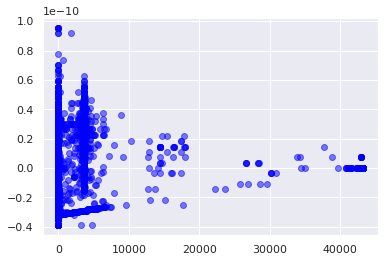

In [259]:
plt.scatter(y_pred,y_test-y_pred,c='blue',alpha=0.5)

In [260]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

1.0

In [261]:
print(f'Error Cuadrático Medio: {metrics.mean_squared_error(y_test,y_pred)}')

Error Cuadrático Medio: 5.638052791995691e-22


## tmcat07

In [262]:
from sklearn.model_selection import train_test_split
target = "tmcat07"
X = df_times.drop(target,axis=1)
y = df_times[target]

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [264]:
from sklearn import linear_model
modelo = linear_model.LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [265]:
y_pred = modelo.predict(X_test)
pd.DataFrame(modelo.coef_,X.columns,columns=['Coefficient'])

,Coefficient
start,3.450798e-17
logintime,5.065393e-16
totaltime,5.000000e-01
tmcat00,5.000000e-01
tmcat01,-1.000000e+00
tmcat02,-1.000000e+00
tmcat03,-1.000000e+00
tmcat04,-1.000000e+00
tmcat05,-1.000000e+00
tmcat06,-1.000000e+00


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


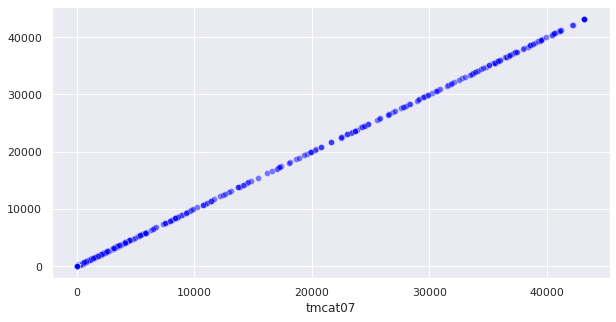

In [266]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.figure(figsize=(10,5))
sns.scatterplot(y_test,y_pred,color='blue',alpha=0.5)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


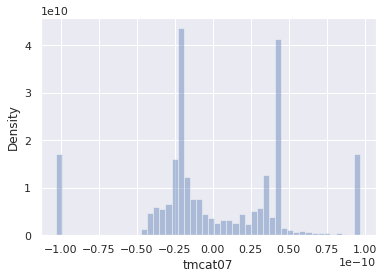

In [267]:
sns.distplot((y_test-y_pred),bins=50)

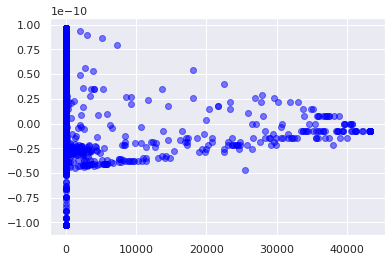

In [268]:
plt.scatter(y_pred,y_test-y_pred,c='blue',alpha=0.5)

In [269]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

1.0

In [270]:
print(f'Error Cuadrático Medio: {metrics.mean_squared_error(y_test,y_pred)}')

Error Cuadrático Medio: 2.2078615970024604e-21
